#### Importing python packages

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

#### Loading the MNIST database

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Defining the model

In [3]:
HIDDEN_NEURONS = 32
DROPOUT_RATE = 0.2

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(HIDDEN_NEURONS, activation='relu'),
                                    tf.keras.layers.Dropout(DROPOUT_RATE),
                                    tf.keras.layers.Dense(10, activation='softmax')])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Defining training

In [6]:
LEARNING_RATE = 0.0001

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [8]:
VALIDATION_SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 32

In [9]:
history = model.fit(x_train,
                    y_train,
                    validation_split=VALIDATION_SPLIT,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 45us/sample - loss: 1.2117 - accuracy: 0.6570 - val_loss: 0.5817 - val_accuracy: 0.8689
Epoch 2/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.6238 - accuracy: 0.8223 - val_loss: 0.4010 - val_accuracy: 0.9006
Epoch 3/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.4961 - accuracy: 0.8560 - val_loss: 0.3349 - val_accuracy: 0.9131
Epoch 4/10
48000/48000 [==============================] - 2s 33us/sample - loss: 0.4332 - accuracy: 0.8734 - val_loss: 0.2997 - val_accuracy: 0.9202
Epoch 5/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3933 - accuracy: 0.8859 - val_loss: 0.2762 - val_accuracy: 0.9258
Epoch 6/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3637 - accuracy: 0.8950 - val_loss: 0.2581 - val_accuracy: 0.9303
Epoch 7/10
48000/48000 [==============================] 

## Plotting training curves

In [10]:
def plot_learning_curves(history: tf.keras.callbacks.History):
    history = history.history
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    ax1.title.set_text('Loss curves')
    ax1.plot(range(1, EPOCHS+1),
             history['loss'],
             label='loss')
    ax1.plot(range(1, EPOCHS+1),
             history['val_loss'],
             label='val_loss')
    ax1.legend()

    ax2.title.set_text('Accurracy curves')
    ax2.plot(range(1, EPOCHS+1),
             history['accuracy'],
             label='accuracy')
    ax2.plot(range(1, EPOCHS+1),
             history['val_accuracy'],
             label='val_accuracy')
    ax2.legend()

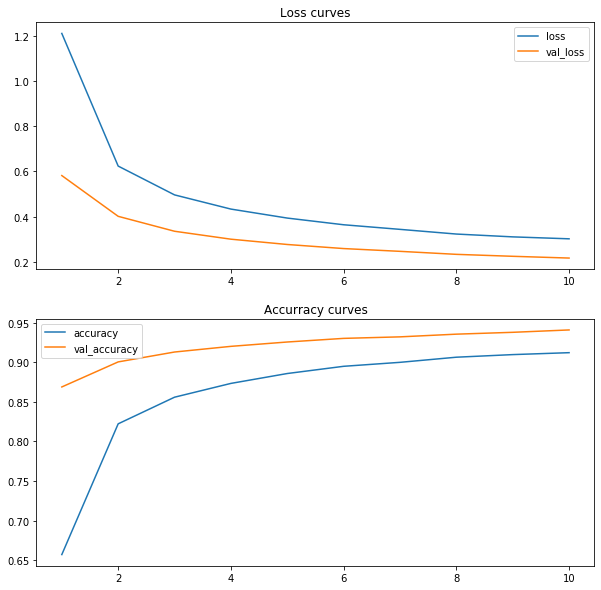

In [11]:
plot_learning_curves(history)

## Testing the model

#### Performance on training set (includes validation set)

In [12]:
model.evaluate(x_train, y_train, verbose=2)

60000/1 - 1s - loss: 0.1439 - accuracy: 0.9388


[0.2167750705704093, 0.93878335]

#### Performance on hold-out test set (should be similar to training)

In [13]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.1355 - accuracy: 0.9387


[0.21709787949323653, 0.9387]

## Saving the model for JS
#### Overrides model in the repository

In [14]:
model.save('../model/model.h5')